## Linear Regression from Scratch

In this notebook, we will implement **Linear Regression** using only **NumPy**, without any machine learning libraries.  
### Step-1 Load and Explore the Dataset
Import numpy and other important libraries .    
We'll use a simple dataset stored in `/data/score.csv`.  
It has two columns,`Hours` and `Score`.

In [1]:
import numpy 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/score.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


Hours     0
Scores    0
dtype: int64

## Step-2 Visualize the Data
Let’s look at how `Hours` and `Score` are related.


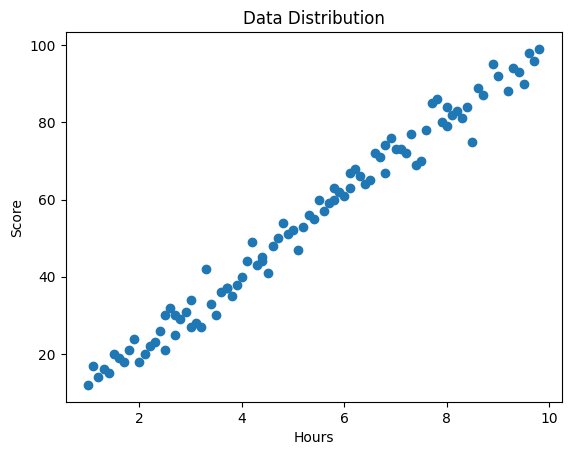

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

plt.plot(X, y,'o')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Data Distribution')
plt.show()

(array([ 9., 11., 10., 11.,  8., 11., 10., 10.,  8.,  8.]),
 array([1.  , 1.88, 2.76, 3.64, 4.52, 5.4 , 6.28, 7.16, 8.04, 8.92, 9.8 ]),
 <BarContainer object of 10 artists>)

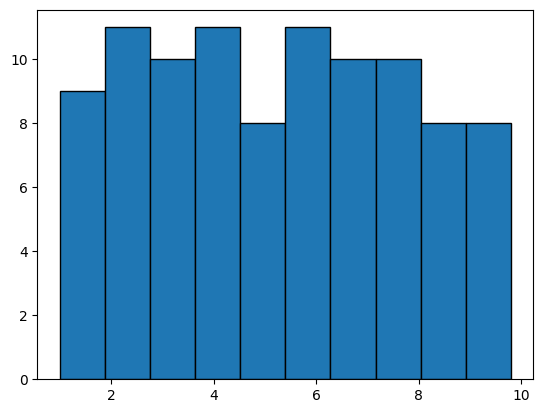

In [4]:
plt.hist(X, bins=10, edgecolor='black')

## Step-3 Import Linear Regression Implementation
We'll use our custom Linear Regression class from `src/Single_Linear_Regression.py`.

In [5]:
import sys
import os

sys.path.append(os.path.abspath('..'))
from src.Single_Linear_Regression import train_linear_regression, plot_regression , predict

In [6]:
slope, inter = train_linear_regression(df, learning_rate=0.001, epochs=1000)
print(f"Slope: {slope}, Intercept: {inter}")

Slope: 9.935321599565341, Intercept: 1.645587295158285


# Step-4 Train sklearn model for comparison
Training the linear regression model using sklearn to verift the results we get from our model


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print(f'{model.coef_[0]} {model.intercept_}')

9.901318259246043 1.8635766281174497


# Step 5: Compare both models visually

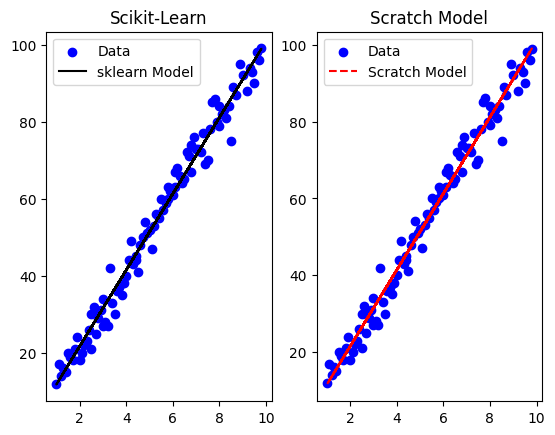

In [9]:
plt.subplot(1,2,1)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='black', label='sklearn Model')
plt.legend()
plt.title("Scikit-Learn")
plt.subplot(1,2,2)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, slope * X + inter, color='red', linestyle='--', label='Scratch Model')
plt.legend()
plt.title("Scratch Model")
plt.show()

# Step 6: Comparing both models accuracy

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(76, 1)

In [13]:
# training model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# getting slope and intercept from our Linear Regression model
df_train = pd.DataFrame({'Hours': X_train.flatten(), 'Scores': y_train})
slope, inter = train_linear_regression(df_train, learning_rate=0.001, epochs=500)

In [19]:
# predictions
y_model = model.predict(X_test)
y_scratch = predict(slope, inter, X_test)

In [20]:
# Comparing both models accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Scikit-Learn Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_model)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_model)}")
print(f"R^2 Score: {r2_score(y_test, y_model)}")

print("\nScratch Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_scratch)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_scratch)}")
print(f"R^2 Score: {r2_score(y_test, y_scratch)}")

Scikit-Learn Model Performance:
Mean Absolute Error: 3.3702236454952397
Mean Squared Error: 17.007444250866516
R^2 Score: 0.9708871356050831

Scratch Model Performance:
Mean Absolute Error: 3.313020822681561
Mean Squared Error: 16.349699642745556
R^2 Score: 0.9720130443130736
